In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
# Set the path to the dataset directory
dataset_path = "final_data/"

# Set the image dimensions and batch size
img_height, img_width = 150, 150
batch_size = 32

In [3]:
# Data preprocessing and augmentation
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)

validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=(img_height, img_width),
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 3123 images belonging to 5 classes.
Found 779 images belonging to 5 classes.


In [5]:
# Build and train the CNN model
model_cnn = keras.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(img_height, img_width, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model_cnn.compile(optimizer='adam',
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

history = model_cnn.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)

Epoch 1/10
98/98 [==============================] - 60s 606ms/step - loss: 0.9594 - accuracy: 0.6158 - val_loss: 0.6387 - val_accuracy: 0.7689
Epoch 2/10
98/98 [==============================] - 58s 590ms/step - loss: 0.6139 - accuracy: 0.7711 - val_loss: 0.5572 - val_accuracy: 0.8023
Epoch 3/10
98/98 [==============================] - 58s 589ms/step - loss: 0.5109 - accuracy: 0.8124 - val_loss: 0.5730 - val_accuracy: 0.7920
Epoch 4/10
98/98 [==============================] - 59s 604ms/step - loss: 0.4572 - accuracy: 0.8293 - val_loss: 0.5146 - val_accuracy: 0.8318
Epoch 5/10
98/98 [==============================] - 58s 593ms/step - loss: 0.4347 - accuracy: 0.8364 - val_loss: 0.5709 - val_accuracy: 0.8023
Epoch 6/10
98/98 [==============================] - 58s 594ms/step - loss: 0.3939 - accuracy: 0.8527 - val_loss: 0.7528 - val_accuracy: 0.7420
Epoch 7/10
98/98 [==============================] - 59s 596ms/step - loss: 0.3688 - accuracy: 0.8646 - val_loss: 0.5245 - val_accuracy: 0.8190

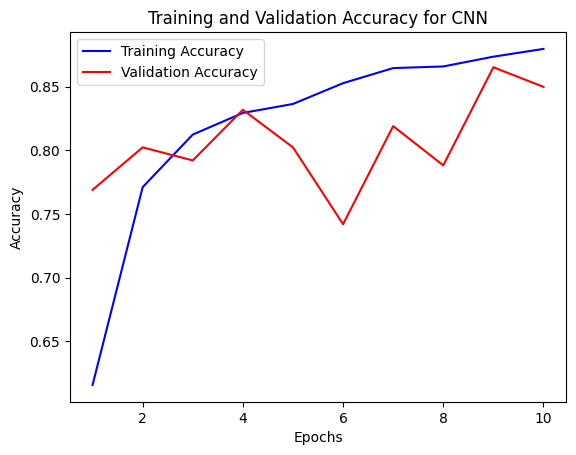

In [6]:
# Get the training and validation accuracy values from the history object
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

# Plot the training and validation accuracy curves
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')

plt.title('Training and Validation Accuracy for CNN')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [7]:
# Apply transfer learning using pre-trained model
base_model = tf.keras.applications.MobileNetV2(input_shape=(img_height, img_width, 3),
                                               include_top=False,
                                               weights='imagenet')

base_model.trainable = False

model_transfer_learning = keras.Sequential([
    base_model,
    layers.GlobalAveragePooling2D(),
    layers.Dense(128, activation='relu'),
    layers.Dense(5, activation='softmax')
])

model_transfer_learning.compile(optimizer='adam',
                                loss='categorical_crossentropy',
                                metrics=['accuracy'])

history_tf = model_transfer_learning.fit(
    train_generator,
    validation_data=validation_generator,
    epochs=10
)


Epoch 1/10
98/98 [==============================] - 60s 599ms/step - loss: 0.2927 - accuracy: 0.8972 - val_loss: 0.2551 - val_accuracy: 0.9166
Epoch 2/10
98/98 [==============================] - 57s 584ms/step - loss: 0.1292 - accuracy: 0.9497 - val_loss: 0.2208 - val_accuracy: 0.9345
Epoch 3/10
98/98 [==============================] - 57s 586ms/step - loss: 0.1061 - accuracy: 0.9603 - val_loss: 0.2187 - val_accuracy: 0.9320
Epoch 4/10
98/98 [==============================] - 57s 584ms/step - loss: 0.1009 - accuracy: 0.9622 - val_loss: 0.2010 - val_accuracy: 0.9371
Epoch 5/10
98/98 [==============================] - 57s 581ms/step - loss: 0.0927 - accuracy: 0.9670 - val_loss: 0.2146 - val_accuracy: 0.9409
Epoch 6/10
98/98 [==============================] - 58s 587ms/step - loss: 0.0821 - accuracy: 0.9696 - val_loss: 0.1896 - val_accuracy: 0.9499
Epoch 7/10
98/98 [==============================] - 63s 648ms/step - loss: 0.0667 - accuracy: 0.9763 - val_loss: 0.2465 - val_accuracy: 0.9178

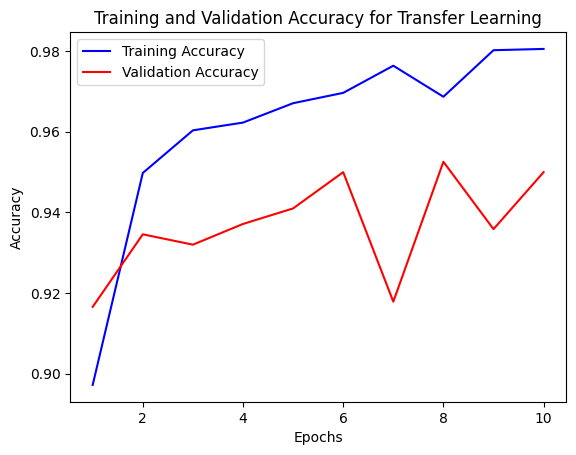

In [8]:
# Get the training and validation accuracy values from the history object
train_accuracy = history_tf.history['accuracy']
val_accuracy = history_tf.history['val_accuracy']

# Plot the training and validation accuracy curves
epochs = range(1, len(train_accuracy) + 1)

plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')

plt.title('Training and Validation Accuracy for Transfer Learning')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.show()

In [46]:
# Saving the trained model
model_transfer_learning.save('trained_model.h5')
model_cnn.save('cnn_trained_model.h5')

In [9]:
# Evaluate the models
cnn_loss, cnn_accuracy = model_cnn.evaluate(validation_generator)
transfer_loss, transfer_accuracy = model_transfer_learning.evaluate(validation_generator)

print("CNN Model - Loss:", cnn_loss, "Accuracy:", cnn_accuracy)
print("Transfer Learning Model - Loss:", transfer_loss, "Accuracy:", transfer_accuracy)

25/25 [==============================] - 10s 404ms/step - loss: 0.2155 - accuracy: 0.9487
CNN Model - Loss: 0.4653889536857605 Accuracy: 0.848523736000061
Transfer Learning Model - Loss: 0.21549871563911438 Accuracy: 0.9486520886421204


In [19]:
import numpy as np
from tensorflow.keras.preprocessing import image

# Load and preprocess the test image
test_image_path = "sort_sports/2023-07-03_04-16-29_UTC.jpg"
test_image = image.load_img(test_image_path, target_size=(img_height, img_width))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
test_image /= 255.0

In [20]:
# Make predictions using the CNN model
cnn_predictions = model_cnn.predict(test_image)
cnn_predicted_class = np.argmax(cnn_predictions)
cnn_class_labels = train_generator.class_indices
cnn_predicted_label = list(cnn_class_labels.keys())[list(cnn_class_labels.values()).index(cnn_predicted_class)]

# Make predictions using the transfer learning model
transfer_predictions = model_transfer_learning.predict(test_image)
transfer_predicted_class = np.argmax(transfer_predictions)
transfer_class_labels = train_generator.class_indices
transfer_predicted_label = list(transfer_class_labels.keys())[list(transfer_class_labels.values()).index(transfer_predicted_class)]

1/1 [==============================] - 0s 36ms/step


In [21]:
# Print the predictions
print("CNN Predicted Label:", cnn_predicted_label)
print("Transfer Learning Predicted Label:", transfer_predicted_label)

CNN Predicted Label: sports
Transfer Learning Predicted Label: sports


In [45]:
import json

with open('tags.json', 'r') as json_file:
    hashtags_mapping = json.load(json_file)

In [47]:
import numpy as np
from tensorflow.keras.preprocessing import image


# Loading the saved model
loaded_model = tf.keras.models.load_model('trained_model.h5')
# cnn_loaded_model = tf.keras.models.load_model('cnn_trained_model.h5')

def _get_hashtag(label):
    return ','.join([i for i in random.choice(hashtags_mapping[f"{label}"])])


def get_final_hashtags(img_path):
    # Load and preprocess the test image
    test_image_path = img_path
    test_image = image.load_img(test_image_path, target_size=(img_height, img_width))
    test_image = image.img_to_array(test_image)
    test_image = np.expand_dims(test_image, axis=0)
    test_image /= 255.0
    # Make predictions using the CNN model
#     cnn_predictions = cnn_loaded_model.predict(test_image)
#     cnn_predicted_class = np.argmax(cnn_predictions)
#     cnn_class_labels = train_generator.class_indices
#     cnn_predicted_label = list(cnn_class_labels.keys())[list(cnn_class_labels.values()).index(cnn_predicted_class)]

    # Make predictions using the transfer learning model
    transfer_predictions = loaded_model.predict(test_image)
    transfer_predicted_class = np.argmax(transfer_predictions)
    transfer_class_labels = train_generator.class_indices
    transfer_predicted_label = list(transfer_class_labels.keys())[list(transfer_class_labels.values()).index(transfer_predicted_class)]
    
    res = f"#{transfer_predicted_label},"+f"{_get_hashtag(transfer_predicted_label)}"
    
    return res

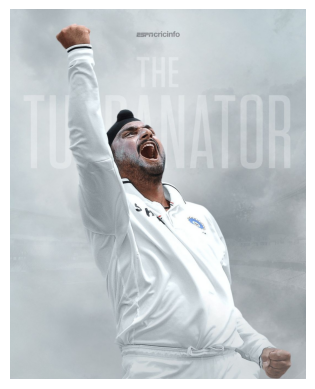

1/1 [==============================] - 1s 562ms/step


'#sports,#sportscommunity,#sportscompetition,#sportsspirit,#sportsentertainment,#sportsstyle'

In [48]:
from PIL import Image
import matplotlib.pyplot as plt
img_path = 'sort_sports/2023-07-03_04-16-29_UTC.jpg'
test_image = Image.open(img_path)

# Display the test image
plt.imshow(test_image)
plt.axis('off')
plt.show()

get_final_hashtags(img_path)